In [1]:
import numpy as np               #General-purpose array-processing package
import pandas as pd              #Package for analysing data
import scipy.stats as stats      #Library of statistical functions
import matplotlib.pyplot as plt  #For plotting graphs
import seaborn as sns
%matplotlib inline

# Data warehouse
## Loading Data

In [17]:
data = pd.read_csv('companyX_EU.csv')  #read the csv file

In [18]:
data.head(10)                          #getting data of first 10 rows

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
9,Adgregate Markets,adgregate.com,NaN,TC50 2008,Contestant,Operating


# Data exploration

In [19]:
data.info()                         #check the data type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
Startup           662 non-null object
Product           656 non-null object
Funding           448 non-null object
Event             662 non-null object
Result            662 non-null object
OperatingState    662 non-null object
dtypes: object(6)
memory usage: 31.2+ KB


In [20]:
data.isnull().sum()                 #Gives the number of null values for each column

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

# Data preprocessing & visualisation

In [21]:
data = data.dropna(axis=0,how="any")  #dropping all the rows containing Nan values
newdata = data.reset_index(drop=True) #resetting the index since after dropping the rows containing Nan values index changes
newdata.rename(columns = {'Funding':'Funding_Dollars'},inplace=True) #change column name "Funding" to "Funding in dollars"


In [22]:
newdata.Funding_Dollars = [x.strip('$') for x in newdata.Funding_Dollars]   #removing '$' sign from the Funding_dollars column

In [23]:
newdata['Funding_Dollars'].value_counts() 

1M       17
2M       12
3M        9
1.3M      9
1.2M      9
         ..
983K      1
5.1M      1
5.5M      1
11.3M     1
16.2M     1
Name: Funding_Dollars, Length: 239, dtype: int64

In [24]:
dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
newdata['Funding_Dollars'] = newdata['Funding_Dollars'].replace(dict, regex=True).map(pd.eval)


In [25]:
newdata.head()

,Startup,Product,Funding_Dollars,Event,Result,OperatingState
0,3DLT,3dlt.com,630000.0,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19300000.0,TC50 2009,Contestant,Acquired
3,8 Securities,8securities.com,29000000.0,Disrupt Beijing 2011,Finalist,Operating
4,AdhereTech,adheretech.com,1800000.0,Hardware Battlefield 2014,Contestant,Operating


In [11]:
newdata.Funding_Dollars = pd.to_numeric(newdata.Funding_Dollars)  # converting Dtype to int

In [26]:
newdata['Funding_Dollars'] = newdata['Funding_Dollars']/ 1000000.0 #Funding_dollars in millions

In [27]:
newdata.head()

,Startup,Product,Funding_Dollars,Event,Result,OperatingState
0,3DLT,3dlt.com,0.63,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,1.00,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,19.30,TC50 2009,Contestant,Acquired
3,8 Securities,8securities.com,29.00,Disrupt Beijing 2011,Finalist,Operating
4,AdhereTech,adheretech.com,1.80,Hardware Battlefield 2014,Contestant,Operating


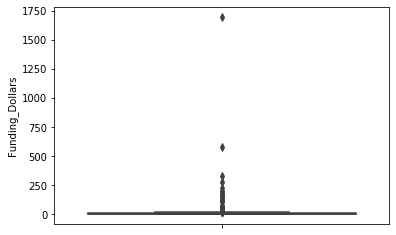

In [30]:
sns.boxplot(y=newdata['Funding_Dollars'])   #box plot to show distributions with respect to Funding_Dollars
plt.show()

In [31]:
newdata['Funding_Dollars'].describe()  #this gives the 5 point summary of the data

count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: Funding_Dollars, dtype: float64

 lower fence value is 0.005

In [32]:
upper_quartile = np.percentile(newdata['Funding_Dollars'], 75)
lower_quartile = np.percentile(newdata['Funding_Dollars'], 25)

iqr = upper_quartile - lower_quartile   #Inter-quartile range
upper_Fence = newdata['Funding_Dollars'][newdata['Funding_Dollars']<=upper_quartile+1.5*iqr].max()
lower_Fence = newdata['Funding_Dollars'][newdata['Funding_Dollars']>=lower_quartile-1.5*iqr].min()

In [35]:
lower_Fence    #the lower fence from the box plot

0.005

In [36]:
outlier =[]                                   #finding outliers greater than upper fence
for x in newdata['Funding_Dollars']:
    if (x> upper_Fence) :
        outlier.append(x)
print('outliers in the dataset is',outlier)

outliers in the dataset is [29.0, 24.0, 50.9, 40.0, 205.0, 32.5, 182.1, 35.4, 38.0, 37.1, 72.0, 64.0, 1700.0, 34.6, 35.5, 30.1, 26.0, 66.0, 28.3, 103.0, 25.9, 36.5, 44.7, 24.2, 122.4, 34.9, 67.8, 166.1, 42.1, 69.0, 65.1, 25.1, 31.8, 37.0, 38.5, 25.5, 24.0, 278.0, 24.0, 63.0, 25.0, 160.0, 40.0, 47.4, 24.5, 25.0, 332.4, 35.0, 168.8, 28.0, 30.8, 41.8, 142.0, 117.8, 26.0, 28.0, 62.1, 583.6, 223.0, 31.5]


In [37]:
Count= len(outlier)
print('Number of outliers greater than upper fence is :',Count)

Number of outliers greater than upper fence is : 60


In [38]:
newdata = newdata[(newdata["Funding_Dollars"]<upper_Fence)] #Dropping the values that are greater than upper_fence

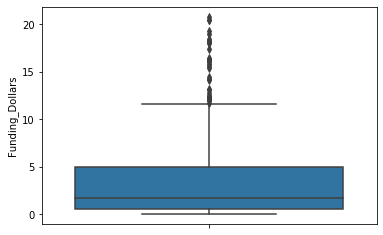

In [39]:
sns.boxplot(y=newdata['Funding_Dollars'])              #boxplot after removing the values greater than upper_fence
plt.show()

In [40]:
newdata["OperatingState"].value_counts()             #frequency of the OperatingState features classes

Operating    274
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

### Distribution plot for funds in million

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


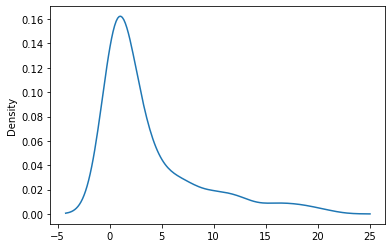

In [41]:
sns.distplot(x=newdata["Funding_Dollars"],hist=False,kde=True) #Distribution plot for Funds in million

### Distribution plots for companies still operating and companies that are closed

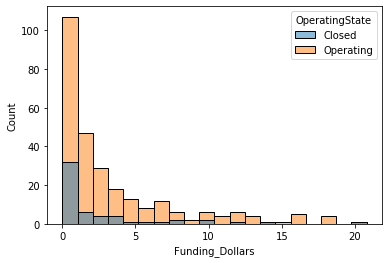

In [42]:
sns.histplot(data=newdata[newdata["OperatingState"] != "Acquired"],x=newdata["Funding_Dollars"], hue = "OperatingState")

# Statistical analysis

Null(H0): There is no significant difference between Funds raised by companies that are still operating vs companies that closed down

Alternate(H1) : There is a significant difference between Funds raised by companies that are still operating vs companies that closed down

Taking level of significance to be 5% ie alpha = 0.05 

In [25]:
from scipy.stats import ttest_ind

In [28]:
operating = np.array(newdata["Funding_Dollars"][newdata["OperatingState"] == "Operating"])
closed    = np.array(newdata["Funding_Dollars"][newdata["OperatingState"] == "Closed"])

In [29]:
operating.mean()

3.450500729927007

In [30]:
closed.mean()

2.6824232142857136

In [32]:
pval = ttest_ind(operating,closed)
print(pval)

Ttest_indResult(statistic=1.2304853084704215, pvalue=0.2193971376638487)


since P-value is very large or much greater than significance level, we fail to reject the null hypothesis

In [44]:
newdata_copy = newdata.copy() # making copy of original dataframe

In [37]:
newdata['Result'].value_counts()

Contestant         282
Finalist            52
Audience choice     20
Winner              17
Runner up           14
Name: Result, dtype: int64

In [47]:
Winners = (newdata['Result'] == 'Winner').sum()
Contestants = (newdata['Result'] == 'Contestant').sum()

In [48]:
Winners_operating = ((newdata['Result']=='Winner') & (newdata['OperatingState']=='Operating')).sum()
Contestants_operating = ((newdata['Result'] == 'Contestant') & (newdata['OperatingState'] == 'Operating')).sum()

In [49]:
print('percentage of winners that are still operating is {:.2f}%'.format(100*Winners_operating/Winners))

percentage of winners that are still operating is 70.59%


In [52]:
print('percentage of contestants that are still operating is {:.2f}%'.format(100*Contestants_operating/Contestants))

percentage of contestants that are still operating is 68.79%


In [55]:
newdata_copy["Event"].value_counts()

TC50 2008                    25
TC40 2007                    22
Disrupt NY 2015              21
Disrupt NYC 2012             19
Disrupt SF 2014              19
Disrupt SF 2015              19
Disrupt SF 2013              19
TC50 2009                    19
Disrupt SF 2011              19
Disrupt NYC 2013             18
Disrupt SF 2016              17
Disrupt NY 2016              16
Disrupt SF 2012              15
Disrupt NYC 2011             15
Disrupt NYC 2014             15
Disrupt SF 2010              13
Hardware Battlefield 2014    12
Hardware Battlefield 2016    12
Disrupt London 2015          11
Hardware Battlefield 2015    10
Disrupt London 2016          10
Disrupt EU 2014              10
Disrupt NYC 2010             10
Disrupt EU 2013               9
-                             6
Disrupt Beijing 2011          4
Name: Event, dtype: int64

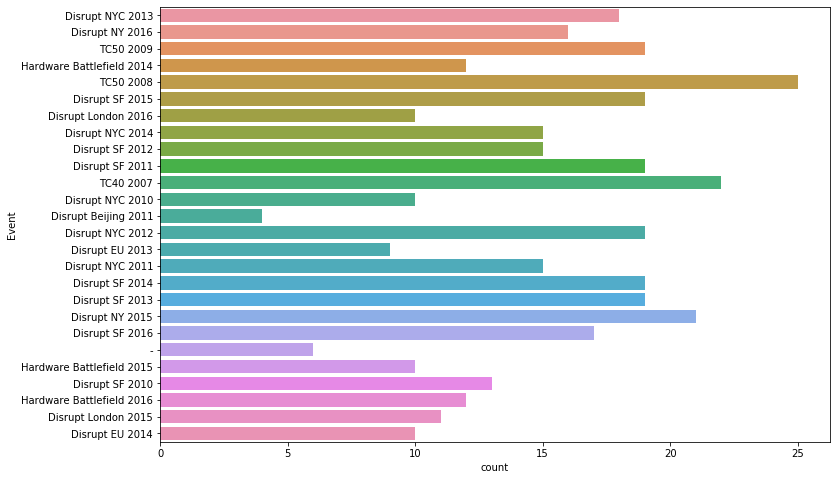

In [62]:
plt.figure(figsize=(12,8))
ax=sns.countplot(y=newdata["Event"])

In [55]:
contained_Disrupt = newdata_copy[newdata_copy['Event'].str.contains('Disrupt',regex =True)]
print(contained_Disrupt)

        Startup         Product  Funding_Dollars                Event  \
0          3DLT        3dlt.com            0.630     Disrupt NYC 2013   
1    3Dprintler  3dprintler.com            1.000      Disrupt NY 2016   
6      Agrilyst    agrilyst.com            1.000      Disrupt SF 2015   
7         Aiden        aiden.ai            0.750  Disrupt London 2016   
9       Aircall      aircall.io           11.600      Disrupt SF 2015   
..          ...             ...              ...                  ...   
427   Welltwigs   welltwigs.com            0.050      Disrupt NY 2015   
430    Workspot    workspot.com           15.800     Disrupt NYC 2013   
431       Xendo       xendo.com            0.028      Disrupt SF 2014   
435  YayPay Inc      yaypay.com            0.900  Disrupt London 2015   
444        Zula     zulaapp.com            3.400      Disrupt SF 2013   

              Result OperatingState  
0         Contestant         Closed  
1    Audience choice      Operating  
6        

In [68]:
def filtered(event):         #Selecting only the Event that has disrupt keyword from 2013 onwards.
    return int(event[-4:])>=2013
FilteredEvents = contained_Disrupt['Event'][contained_Disrupt['Event'].apply(filtered)]

In [99]:
FilteredEvents

0         Disrupt NYC 2013
1          Disrupt NY 2016
6          Disrupt SF 2015
7      Disrupt London 2016
9          Disrupt SF 2015
              ...         
427        Disrupt NY 2015
430       Disrupt NYC 2013
431        Disrupt SF 2014
435    Disrupt London 2015
444        Disrupt SF 2013
Name: Event, Length: 184, dtype: object

In [100]:
newdata_copy['three_cities'] = newdata_copy['Event'].str.replace('\d+','') #removing year from event 


In [98]:
three_cities_data = newdata_copy[(newdata_copy['three_cities'] == 'Disrupt NY')|(newdata_copy['three_cities'] == "Disrupt SF")|(newdata_copy["three_cities"] == "Disrupt EU")]